In [25]:
import pandas as pd
del __
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]
print(alldfs)

['dfspark', 'pandas_allflights']


In [2]:
import pyspark
import os
os.getcwd()
import findspark
findspark.init('/Users/priyankapatil/anaconda3/lib/python3.7/site-packages/pyspark')
print ("Hey Priyanka")
from pyspark.sql import Row
from pyspark.sql import functions
from pyspark.sql import SQLContext
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pyspark.sql.functions as func
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np


spark = SparkSession.builder.config("spark.sql.warehouse.dir", "file:///C:/temp").appName("SparkSQL").getOrCreate()

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]").set('spark.executor.memory', '4G').set('spark.driver.memory', '45G'))
sqlContext = SQLContext(sc)
sc

Hey Priyanka


<SparkContext master=local[*] appName=SparkSQL>

In [3]:
dfspark = pd.read_csv(r'/Users/priyankapatil/Desktop/Data/merged.csv',sep=',')
pd.set_option('display.max_columns', None)

/Users/priyankapatil/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,7,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dfspark.drop(["DEP_TIME","ARR_TIME","TAIL_NUM","TAXI_OUT","TAXI_IN","YEAR", "QUARTER","DAY_OF_MONTH","AIR_TIME","OP_UNIQUE_CARRIER"], axis=1, inplace=True)


In [6]:
int_cols = ['MONTH','DAY_OF_WEEK','OP_CARRIER_FL_NUM','CRS_DEP_TIME','DEP_DELAY','CRS_ARR_TIME']
dfspark[int_cols] = dfspark[int_cols].apply(pd.to_numeric, downcast='float', errors='coerce')
#int_cols = ['CANCELLED','DIVERTED','CRS_ELAPSED_TIME','ARR_DELAY']
#dfspark[int_cols] = dfspark[int_cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [7]:
int_cols = ['ACTUAL_ELAPSED_TIME','DISTANCE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
dfspark[int_cols] = dfspark[int_cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [30]:
#dfspark['DEP_DEL15'] = (dfspark['DEP_DELAY'] > 15).astype(float)
#del dfspark['DEP_DEL15']
#dfspark['DEP_DEL15'] = np.where((dfspark['DEP_DELAY'] > 15),10,0)

int_cols = ['DEP_DEL15','Traffic']
dfspark[int_cols] = dfspark[int_cols].apply(pd.to_numeric, downcast='float', errors='coerce')


In [31]:
dfspark.dtypes

MONTH                  float32
DAY_OF_WEEK            float32
OP_CARRIER_FL_NUM      float32
ORIGIN                  object
DEST                    object
CRS_DEP_TIME           float32
DEP_DELAY              float32
CRS_ARR_TIME           float32
ARR_DELAY              float32
CANCELLED              float32
CANCELLATION_CODE       object
DIVERTED               float32
CRS_ELAPSED_TIME       float32
ACTUAL_ELAPSED_TIME    float32
DISTANCE               float32
CARRIER_DELAY          float32
WEATHER_DELAY          float32
NAS_DELAY              float32
SECURITY_DELAY         float32
LATE_AIRCRAFT_DELAY    float32
Traffic                float32
DEP_DEL15              float32
dtype: object

In [11]:
dfspark['CRS_DEP_TIME'] = dfspark['CRS_DEP_TIME'].div(300)
dfspark['CRS_ARR_TIME'] = dfspark['CRS_ARR_TIME'].div(300)
dfspark['CRS_ELAPSED_TIME'] = dfspark['CRS_ELAPSED_TIME'].div(300)
#df_flown.head(100)

In [12]:
dfspark['Traffic'] = np.where((dfspark['ORIGIN'] == 'ATL') | (dfspark['ORIGIN'] == 'ORD') | (dfspark['ORIGIN'] == 'DFW'),10,0)

In [18]:
dfspark.head(100)

,MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 30,Traffic,DEP_DEL15
0,5.0,2.0,3700.0,STL,EWR,2.000000,-2.0,3.103333,-2.0,0.0,NaN,0.0,0.503333,151.0,872.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,5.0,2.0,3701.0,ORD,RDU,3.750000,-9.0,4.773334,-27.0,0.0,NaN,0.0,0.423333,109.0,646.0,NaN,NaN,NaN,NaN,NaN,NaN,10,0
2,5.0,2.0,3702.0,MSP,ORD,3.756667,-6.0,4.360000,-7.0,0.0,NaN,0.0,0.336667,100.0,334.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,5.0,2.0,3703.0,ORD,BNA,4.683333,-5.0,5.146667,-6.0,0.0,NaN,0.0,0.330000,98.0,409.0,NaN,NaN,NaN,NaN,NaN,NaN,10,0
4,5.0,2.0,3705.0,EWR,MCI,5.150000,-8.0,5.846667,-17.0,0.0,NaN,0.0,0.630000,180.0,1092.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5,5.0,2.0,3706.0,EWR,IND,6.516667,-5.0,7.370000,27.0,0.0,NaN,0.0,0.453333,168.0,645.0,0.0,0.0,27.0,0.0,0.0,NaN,0,0
6,5.0,2.0,3707.0,LFT,IAH,2.346667,-9.0,2.700000,-17.0,0.0,NaN,0.0,0.220000,58.0,201.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
7,5.0,2.0,3708.0,ORD,MSP,3.366667,-7.0,3.820000,10.0,0.0,NaN,0.0,0.320000,113.0,334.0,NaN,NaN,NaN,NaN,NaN,NaN,10,0
8,5.0,2.0,3709.0,IAH,JAX,2.483333,3.0,3.526667,-10.0,0.0,NaN,0.0,0.443333,120.0,817.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
9,5.0,2.0,3709.0,CRP,IAH,1.816667,-2.0,2.150000,-9.0,0.0,NaN,0.0,0.200000,53.0,201.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [32]:
dfspark=dfspark.loc[:, ~dfspark.columns.str.contains('^Unnamed')]

In [33]:
pandas_allflights=dfspark

In [34]:
#Create Schema to convert to Spark dataframe
schema = StructType([StructField("Month", StringType(), True)\
                       ,StructField("DAY_OF_WEEK", FloatType(), True)\
                       ,StructField("FlightNo", FloatType(), True)\
                       ,StructField("Origin", StringType(), True)\
                       ,StructField("Dest", StringType(), True)\
                       ,StructField("SchDep", FloatType(), True)\
                       ,StructField("DepDelay", FloatType(), True)\
                       ,StructField("SchArr", FloatType(), True)\
                       ,StructField("ArrDelay", FloatType(), True)\
                       ,StructField("Cancelled", FloatType(), True)\
                       ,StructField("Cancelcode", StringType(), True)\
                       ,StructField("Diverted", FloatType(), True)\
                       ,StructField("SchElapsedTime", FloatType(), True)\
                       ,StructField("ElapsedTime", FloatType(), True)\
                       ,StructField("Distance", FloatType(), True)\
                       ,StructField("CarrierDelay", FloatType(), True)\
                       ,StructField("WeatherDelay", FloatType(), True)\
                       ,StructField("NASDelay", FloatType(), True)\
                       ,StructField("SecurityDelay", FloatType(), True)\
                       ,StructField("LateAircraftDelay", FloatType(), True)\
                       ,StructField("Traffic", FloatType(), True)\
                       ,StructField("DepDelay15", FloatType(), True)])
                      # ,StructField("Traffic", IntegerType(), True)])
                   #    ,StructField("Unnamed", StringType(), True)])

In [74]:
dataspark = spark.createDataFrame(pandas_allflights.head(100000), schema=schema)
dataspark.show(5)
pandas_someflights=pandas_allflights.head(100000)


+-----+-----------+--------+------+----+---------+--------+---------+--------+---------+----------+--------+--------------+-----------+--------+------------+------------+--------+-------------+-----------------+-------+----------+
|Month|DAY_OF_WEEK|FlightNo|Origin|Dest|   SchDep|DepDelay|   SchArr|ArrDelay|Cancelled|Cancelcode|Diverted|SchElapsedTime|ElapsedTime|Distance|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|Traffic|DepDelay15|
+-----+-----------+--------+------+----+---------+--------+---------+--------+---------+----------+--------+--------------+-----------+--------+------------+------------+--------+-------------+-----------------+-------+----------+
|  5.0|        2.0|  3700.0|   STL| EWR|      2.0|    -2.0|3.1033332|    -2.0|      0.0|       NaN|     0.0|    0.50333333|      151.0|   872.0|         NaN|         NaN|     NaN|          NaN|              NaN|    0.0|       0.0|
|  5.0|        2.0|  3701.0|   ORD| RDU|     3.75|    -9.0|4.7733335|   -27.

In [36]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col

In [38]:
#parse columns for classification(datac) reason for cancellation & Regression(datar) for cancelled flights

# label is cancelled column and rest all is features
datar = dataspark.rdd.map(lambda x: ((x[9]), Vectors.dense(float(x[1]),float(x[2]),float(x[5]),
                                                           float(x[7]),float(x[14]),float(x[20]),float(x[21]))))

# lsbel is cancellationcode rest all is features
datac = dataspark.rdd.map(lambda x: ((x[10]), Vectors.dense(float(x[1]),float(x[2]),float(x[5]),float(x[7]),
                                                            float(x[14]),float(x[20]),float(x[21]))))


In [39]:
# create dataframe for classification(datac) & Regression(datapr)

datac = sqlContext.createDataFrame(datac, ['label','features'],samplingRatio=0.2)
datapr = sqlContext.createDataFrame(datar, ['label','features'],samplingRatio=0.2)

In [40]:
datac

DataFrame[label: string, features: vector]

In [41]:
#Filter out null values

dfapp1=datac.filter("label is not null")
dfapp2=datapr.filter("label is not null")

In [42]:
# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel", handleInvalid="skip").fit(dfapp1)

In [43]:
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(dfapp1)

In [44]:
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = dfapp1.randomSplit([0.7, 0.3])

In [45]:
# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

In [46]:
# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

In [47]:
# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

In [48]:
# Make predictions.
predictions = model.transform(testData)

In [51]:
# Select example rows to display.
predictions.select("prediction", "indexedLabel", "label").show(100)

+----------+------------+-----+
|prediction|indexedLabel|label|
+----------+------------+-----+
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         2.0|    A|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       0.0|         1.0|    B|
|       

In [50]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

Test Error = 0.0234406 


In [52]:
treeModel = model.stages[2]


In [53]:
print(treeModel)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_e711e3d86090) of depth 0 with 1 nodes


In [54]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)

In [55]:
# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

In [56]:
# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

In [57]:
# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

In [58]:
# Make predictions.
predictions = model.transform(testData)

In [60]:
# Select example rows to display.
predictions.select("predictedLabel", "label", "features").show(100)

+--------------+-----+--------------------+
|predictedLabel|label|            features|
+--------------+-----+--------------------+
|           NaN|    A|[1.0,6094.0,4.0,4...|
|           NaN|    A|[2.0,6119.0,6.016...|
|           NaN|    A|[3.0,3406.0,3.833...|
|           NaN|    A|[4.0,3040.0,1.799...|
|           NaN|    A|[4.0,3049.0,7.369...|
|           NaN|    A|[4.0,6111.0,6.150...|
|           NaN|    A|[4.0,6222.0,6.183...|
|           NaN|    A|[4.0,6224.0,6.173...|
|           NaN|    A|[5.0,5972.0,4.666...|
|           NaN|    A|[5.0,6012.0,5.683...|
|           NaN|    A|[6.0,6033.0,7.433...|
|           NaN|    A|[7.0,3138.0,2.466...|
|           NaN|    A|[7.0,6079.0,3.423...|
|           NaN|    B|[2.0,6101.0,5.433...|
|           NaN|    B|[2.0,6120.0,7.383...|
|           NaN|    B|[2.0,6146.0,7.816...|
|           NaN|    B|[2.0,6186.0,6.099...|
|           NaN|    B|[2.0,6207.0,5.166...|
|           NaN|    B|[2.0,6222.0,6.183...|
|           NaN|    B|[3.0,3402.

In [100]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark import SparkContext
# from sklearn.cluster import KMeans
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
# 'DAY_OF_WEEK',flight number 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE','Traffic' label= 'DEP_DEL15'

dataset= dataspark.rdd.map(lambda x:(Vectors.dense([float(x[1]),float(x[5]),float(x[7]),float(x[14]),float(x[20])]),x[21]))
dataset= sqlContext.createDataFrame(dataset,["features","label"])
dataset.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[2.0,2.0,3.103333...|  0.0|
|[2.0,3.75,4.77333...|  0.0|
|[2.0,3.7566666603...|  0.0|
|[2.0,4.6833333969...|  0.0|
|[2.0,5.1500000953...|  0.0|
|[2.0,6.5166668891...|  0.0|
|[2.0,2.3466665744...|  0.0|
|[2.0,3.3666665554...|  0.0|
|[2.0,2.4833333492...|  0.0|
|[2.0,1.8166667222...|  0.0|
|[2.0,4.3333334922...| 10.0|
|[2.0,2.6666667461...|  0.0|
|[2.0,1.8500000238...| 10.0|
|[2.0,2.8166666030...|  0.0|
|[2.0,3.7666666507...|  0.0|
|[2.0,5.4166665077...|  0.0|
|[2.0,5.4833331108...| 10.0|
|[2.0,2.3333332538...|  0.0|
|[2.0,3.0099999904...|  0.0|
|[2.0,4.4499998092...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [174]:
from pyspark.ml.clustering import KMeans

# Trains a k-means model.
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(dataset)

In [175]:
# Make predictions
predictions = model.transform(dataset)

In [176]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.7608670376484054


In [177]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[  3.72877268   4.47067801   4.88493949 399.60046776   1.80434505]
[4.00468138e+00 4.55586383e+00 4.99387663e+00 2.11667087e+03
 1.04996656e+00]
[   3.81355591    4.30703511    5.065739   1024.96842317    1.57683025]


In [178]:
from scipy import stats

#Standardize columns for predictions
clmns = ['DAY_OF_WEEK', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE', 'Traffic','DEP_DEL15']
df_tr_std = stats.zscore(pandas_someflights[clmns])
print(df_tr_std)

[[-1.0887284  -1.4832932  -1.0746347   0.12935342 -0.44391444 -0.47632813]
 [-1.0887284  -0.4118328  -0.10766045 -0.26032406  2.2526865  -0.47632813]
 [-1.0887284  -0.40775105 -0.3469914  -0.7982859  -0.44391444 -0.47632813]
 ...
 [-0.4795337  -0.18733628  0.05253683 -0.42412654 -0.44391444 -0.47632813]
 [-0.4795337   1.8229274  -2.7653916  -0.42412654 -0.44391444 -0.47632813]
 [-0.4795337   0.78208     0.90177554 -0.42412654 -0.44391444 -0.47632813]]


In [129]:
pandas_someflights.head(5000)

,MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Traffic,DEP_DEL15,clusters
0,5.0,2.0,3700.0,STL,EWR,2.000000,-2.0,3.103333,-2.0,0.0,NaN,0.0,0.503333,151.0,872.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14
1,5.0,2.0,3701.0,ORD,RDU,3.750000,-9.0,4.773334,-27.0,0.0,NaN,0.0,0.423333,109.0,646.0,NaN,NaN,NaN,NaN,NaN,10.0,0.0,4
2,5.0,2.0,3702.0,MSP,ORD,3.756667,-6.0,4.360000,-7.0,0.0,NaN,0.0,0.336667,100.0,334.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0
3,5.0,2.0,3703.0,ORD,BNA,4.683333,-5.0,5.146667,-6.0,0.0,NaN,0.0,0.330000,98.0,409.0,NaN,NaN,NaN,NaN,NaN,10.0,0.0,7
4,5.0,2.0,3705.0,EWR,MCI,5.150000,-8.0,5.846667,-17.0,0.0,NaN,0.0,0.630000,180.0,1092.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0
5,5.0,2.0,3706.0,EWR,IND,6.516667,-5.0,7.370000,27.0,0.0,NaN,0.0,0.453333,168.0,645.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,8
6,5.0,2.0,3707.0,LFT,IAH,2.346667,-9.0,2.700000,-17.0,0.0,NaN,0.0,0.220000,58.0,201.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14
7,5.0,2.0,3708.0,ORD,MSP,3.366667,-7.0,3.820000,10.0,0.0,NaN,0.0,0.320000,113.0,334.0,NaN,NaN,NaN,NaN,NaN,10.0,0.0,4
8,5.0,2.0,3709.0,IAH,JAX,2.483333,3.0,3.526667,-10.0,0.0,NaN,0.0,0.443333,120.0,817.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14
9,5.0,2.0,3709.0,CRP,IAH,1.816667,-2.0,2.150000,-9.0,0.0,NaN,0.0,0.200000,53.0,201.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14


In [179]:
from sklearn.cluster import KMeans

#Cluster the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to originaal data
pandas_someflights['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

/Users/priyankapatil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [180]:
#Lets analyze the clusters
print(pandas_someflights.groupby(['clusters']).mean())

          MONTH  DAY_OF_WEEK  OP_CARRIER_FL_NUM  CRS_DEP_TIME  DEP_DELAY  \
clusters                                                                   
0           5.0     3.933483        2263.698242      4.757280  13.967272   
1           5.0     3.786991        2745.141357      3.119274   3.177909   
2           5.0     3.728363        2697.652100      5.650105  21.340481   

          CRS_ARR_TIME  ARR_DELAY  CANCELLED  DIVERTED  CRS_ELAPSED_TIME  \
clusters                                                                   
0             5.211061   9.917678   0.021261  0.002491          0.422951   
1             3.567807  -2.070266   0.017497  0.002459          0.471342   
2             6.312201  16.853746   0.028425  0.004848          0.494123   

          ACTUAL_ELAPSED_TIME    DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
clusters                                                                  
0                  123.104225  686.303711      20.662872       5.157453   
1            

(0, 5255.805304979989)

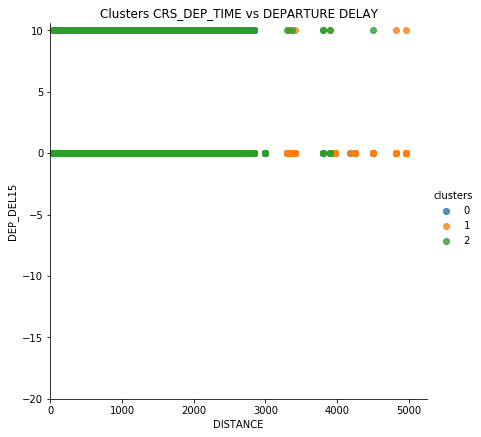

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

#Scatter plot of Departure delay and Arrival Delay leaving from Tampa airport
sns.lmplot('DISTANCE', 'DEP_DEL15', 
           data=pandas_someflights, 
           fit_reg=False, 
           hue='clusters', height = 6)
plt.title('Clusters CRS_DEP_TIME vs DEPARTURE DELAY')
plt.xlabel('DISTANCE')
plt.ylabel('DEP_DEL15')

plt.ylim(-20, None)
plt.xlim(0, None)